<a href="https://colab.research.google.com/gist/qbeer/07eb98879a555a676b6da86ea8cd7f9e/hw_6_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Implement a linear model
return the weight parameters w = (w1, w2, ... , wP) and the intercept parameter w0 separately where:

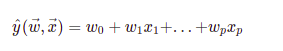

* check your returned coefficients with the built in `LinearRegression` class from the sklearn library, they should be within tolerance 1e-6 to each other

* use a generated regression dataset from `sklearn.dataset import make_regression` API with parameters `n_samples=1000` and `n_features=20`



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
import seaborn as sns

import sys
import os

In [2]:
from sklearn.datasets import make_regression             #for generated dataset

from sklearn.preprocessing import StandardScaler         #DO NOT EVER FORGET THIS!
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression        
from sklearn.linear_model import Lasso, Ridge        
from sklearn.linear_model import LogisticRegression      

In [7]:
data0_X, data0_Y = make_regression(n_samples=1000, n_features=20)

In [8]:
display(data0_X.shape, data0_Y.shape) #seems fine

(1000, 20)

(1000,)

1. Its in a numpy array format
2. It has 20 features, thus I don't have to pop index columns, remove NaNs...
3. I HAVE TO BUILD MINE....

Guide links:

https://in.springboard.com/blog/linear-regression-model/

https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a

So the second gives a really straightforward description with OLS and says that there could a gradient to be used

In [26]:
def cost_function(X, Y, W):
    """
    Calculates the cost
        INPUT:
        X: N x M shaped dataset
        Y: N x 1 shaped dataset
        W: starter coefficents
    """
    m = len(Y)
    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
    return J


def batch_gradient_descent(X, Y, W, alpha, iterations):
    """
    Calculates multivariate linear regression with starter W_1,W_2,... initial guess
    
    Does StandardScaling of the data
    
    INPUT:
        X: N x M shaped dataset
        Y: N x 1 shaped dataset
        W: starter coefficents
        alpha: used for gradient
        iterations: number of iterations
    
    """
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        sys.stdout.write('\r' + str(iteration+1) + '/' + str(iterations))
        sys.stdout.flush()

        # Hypothesis Values
        h = X.dot(W)

        # Difference b/w Hypothesis and Actual Y
        loss = h - Y

        # Gradient Calculation
        gradient = X.T.dot(loss) / m

        # Changing Values of B using Gradient
        W = W - alpha * gradient

        # New Cost Value
        cost = cost_function(X, Y, W)
        cost_history[iteration] = cost

    return W, cost_history

In [19]:
data0_X_train, data0_X_test, data0_Y_train, data0_Y_test = train_test_split(data0_X, data0_Y)

In [25]:
W = np.zeros(data0_X_train.shape[1])
alpha = 0.005
iter_ = 2000
newW, cost_history = batch_gradient_descent(data0_X_train,  data0_Y_train, W, alpha, iter_)

2000/2000

In [23]:
newW

array([ 3.23513060e+01,  5.83767844e+01, -4.72311352e-03,  1.58782690e-02,
        4.79866153e+01, -6.88998705e-03,  5.85879327e-03,  2.31880033e-02,
        8.71515602e+01,  1.61875214e+01,  9.81673604e+01,  9.47979696e+01,
        7.27016087e+01,  4.48068120e-03, -7.61013563e-03,  1.16277937e-02,
       -7.81716339e-03, -4.34302685e-03,  8.19003222e+01,  5.36533965e+01])

## 2. Use of real data

* download the [Communities and Crime Data Set](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) from UCI, the task includes understanding the dataset: naming the appropiate data fields, handling missing values, etc.

* split the data in training/test sets and fit a LinearRegression model with 5-fold cross-validation on top of it - compare training and testing scores (R^2 by default) for the different CV splits, print the mean score and its standard deviation

* fit the best Lasso regression model with 5-fold grid search cross validation (GridSearchCV) on the parameters: alpha, normalize, max_iter and show the best parameters



## 3. Shrinkage

* interpret Lasso models based on its descriptive parameters by the shrinkage method described during the lecture (make a plot and check the names of the features that are not eliminated by the penalty parameter) on the data we have here [ this is an explanatory data analysis problem, try to be creative ]

* fit Ridge models and apply the shrinkage method as well, did you get what you expect?

* do you think normalization is needed here? if so, do not forget to use it in the next tasks



## 4. Subset selection

* Split the data to training and test sets and do recursice feature elimination until 10 remaining predictors with 5-fold cross-validated regressors (RidgeCV, LassoCV, ElasticNetCV) on the training set, plot their names and look up some of their meanings [ recursive feature elimination is part of sklearn but you can do it with a for loop if you whish ]

* Do all models provide the same descriptors? Check their performance on the test set! Plot all model predictions compared to the y_test on 3 different plots, which model seems to be the best?



## 5. ElasticNet penalty surface
* visualize the surface of the `objective(alpha, beta)`

 * parameters corresponding to the L1 and L2 regularizations. Select the best possible combination of the hyper-parameters that minimize the objective (clue: from scipy.optimize import minimize)

* this task is similar to what you've seen during class, just not for MSE vs. single penalty parameter but MSE vs. two penalty parameters `alpha, beta`

* interpret the overall results, do you think regularization is necessary at all? do you think linear models are powerful enough on this dataset?